# Advanced Raster Analysis

## Introduction to Xarray

### Import Required Libraries and set Configurations

In [2]:
# Import the required libraries: matplotlib.pyplot
# Import the required libraries: numpy
# Import the required libraries: xarray

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [3]:
# Call the set_options function
xr.set_options(keep_attrs=True, display_expand_data=False) # Better display and performance
# Call the set_printoptions function
np.set_printoptions(threshold=10, edgeitems=2) # Cleaner output
# Assign a value to plt.rcParams["figure.dpi"]
plt.rcParams["figure.dpi"] = 150

### Loading Data

In [4]:
# Load the dataset 'air_temperature'
ds = xr.tutorial.load_dataset('air_temperature')
# Execute the following operation
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### Accessing DataArrays from Datasets

In [5]:
# Extract the 'air' data array from the dataset
temperature = ds["air"]  # Can also use ds.air
# Execute the following operation
temperature

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

### Exploring DataArray Components

In [6]:
# Print information or results
print('Data shape:', temperature.values.shape)
# Print information or results
print('Data type:', temperature.values.dtype)
# Print information or results
print('First few values:', temperature.values.flat[:5])

Data shape: (2920, 25, 53)
Data type: float64
First few values: [241.2 242.5 243.5 244.  244.1]


In [7]:
# Understand the dimension structure
# Print information or results
print('Dimensions:', temperature.dims)
# Print information or results
print('Dimension sizes:', temperature.sizes)

Dimensions: ('time', 'lat', 'lon')
Dimension sizes: Frozen({'time': 2920, 'lat': 25, 'lon': 53})


In [8]:
# Explore the coordinate information
# Print information or results
print('Coordinates:')
# Loop over items
for name, coord in temperature.coords.items():
 # Print information or results
 print(f' {name}: {coord.values[:3]}... (showing first 3 values)')

Coordinates:
 lat: [75.  72.5 70. ]... (showing first 3 values)
 lon: [200.  202.5 205. ]... (showing first 3 values)
 time: ['2013-01-01T00:00:00.000000000' '2013-01-01T06:00:00.000000000'
 '2013-01-01T12:00:00.000000000']... (showing first 3 values)


In [9]:
# Examine metadata attributes
# Print information or results
print('Attributes:')
# Loop over items
for key, value in temperature.attrs.items():
 # Print information or results
 print(f' {key}: {value}')

Attributes:
 long_name: 4xDaily Air temperature at sigma level 995
 units: degK
 precision: 2
 GRIB_id: 11
 GRIB_name: TMP
 var_desc: Air temperature
 dataset: NMC Reanalysis
 level_desc: Surface
 statistic: Individual Obs
 parent_stat: Other
 actual_range: [185.16 322.1 ]


### Label-based Selection

In [10]:
# Assign the result of the sel function to point_data
point_data = temperature.sel(time="2013-01-01", lat=40.0, lon=260.0)
# Execute the following operation
point_data

<xarray.DataArray 'air' (time: 4)> Size: 32B
265.2 266.2 262.4 267.5
Coordinates:
  * time     (time) datetime64[ns] 32B 2013-01-01 ... 2013-01-01T18:00:00
    lat      float32 4B 40.0
    lon      float32 4B 260.0
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

### Time Range Selection

In [11]:
# Assign the result of the sel function to january_data
january_data = temperature.sel(time=slice("2013-01-01", "2013-01-31"))
# Print information or results
print(f'January 2013 data shape: {january_data.shape}')
# Print information or results
print(f'Time range: {january_data.time.min().values} to {january_data.time.max().values}')

January 2013 data shape: (124, 25, 53)
Time range: 2013-01-01T00:00:00.000000000 to 2013-01-31T18:00:00.000000000


### Nearest Neighbor Selection

In [12]:
# Assign the result of the sel function to nearest_data
nearest_data = temperature.sel(lat=40.5, lon=255.7, method='nearest')
# Assign the result of the sel function to actual_coords
actual_coords = nearest_data.sel(time="2013-01-01")
# Print information or results
print(f'Requested: lat=40.5, lon=255.7')
# Print information or results
print(f'Actual: lat={actual_coords.lat.values}, lon={actual_coords.lon.values}')

Requested: lat=40.5, lon=255.7
Actual: lat=40.0, lon=255.0


### Statistical Operations Across Dimensions

In [13]:
# Assign the result of the mean function to mean_temperature
mean_temperature = temperature.mean(dim='time')
# Print information or results
print(f'Original data shape: {temperature.shape}')
# Print information or results
print(f'Time-averaged data shape: {mean_temperature.shape}')
# Print information or results
print(f'Temperature range: {temperature.min().values:.1f} to {temperature.max().values:.1f} K')

Original data shape: (2920, 25, 53)
Time-averaged data shape: (25, 53)
Temperature range: 221.0 to 317.4 K


### Computing Anomalies

In [14]:
# Assign a value to anomalies
anomalies = temperature - mean_temperature
# Print information or results
print(f'Anomaly range: {anomalies.min().values:.1f} to {anomalies.max().values:.1f} K')
# Assign the result of the max function to max_anomaly
max_anomaly = anomalies.max()
# Assign the result of the where function to max_location
max_location = anomalies.where(anomalies == max_anomaly, drop=True)
# Print information or results
print(f'Largest positive anomaly: {max_anomaly.values:.1f} K')
# Print information or results
print(f'Location: time={max_location.time.values}, lat={max_location.lat.values}, lon={max_location.lon.values}')

Anomaly range: -42.1 to 39.9 K
Largest positive anomaly: 39.9 K
Location: time=['2013-07-01T00:00:00.000000000'], lat=[62.5], lon=[262.5]


In [15]:
# Assign a value to anomalies
anomalies = temperature - mean_temperature
# Print information or results
print(f'Anomaly range: {anomalies.min().values:.1f} to {anomalies.max().values:.1f} K')
# Assign the result of the max function to max_anomaly
max_anomaly = anomalies.max()
# Assign the result of the where function to max_location
max_location = anomalies.where(anomalies == max_anomaly, drop=True)
# Print information or results
print(f'Largest positive anomaly: {max_anomaly.values:.1f} K')
# Print information or results
print(f'Location: time={max_location.time.values}, lat={max_location.lat.values}, lon={max_location.lon.values}')

Anomaly range: -42.1 to 39.9 K
Largest positive anomaly: 39.9 K
Location: time=['2013-07-01T00:00:00.000000000'], lat=[62.5], lon=[262.5]
Largest positive anomaly: 39.9 K
Location: time=['2013-07-01T00:00:00.000000000'], lat=[62.5], lon=[262.5]


### Spatial Statistics

In [16]:
# Assign the result of the mean function to spatial_mean
spatial_mean = temperature.mean(dim=['lat', 'lon'])
# Print information or results
print(f'Spatial mean temperature time series shape: {spatial_mean.shape}')

Spatial mean temperature time series shape: (2920,)


In [17]:
# Assign the result of the argmax function to warmest_date
warmest_date = spatial_mean.time[spatial_mean.argmax()]
# Assign the result of the argmin function to coldest_date
coldest_date = spatial_mean.time[spatial_mean.argmin()]
# Print information or results
print(f'Warmest period: {warmest_date.values}')
# Print information or results
print(f'Coldest period: {coldest_date.values}')

Warmest period: 2013-08-12T00:00:00.000000000
Coldest period: 2014-02-12T12:00:00.000000000


### Plotting 2D Spatial Data

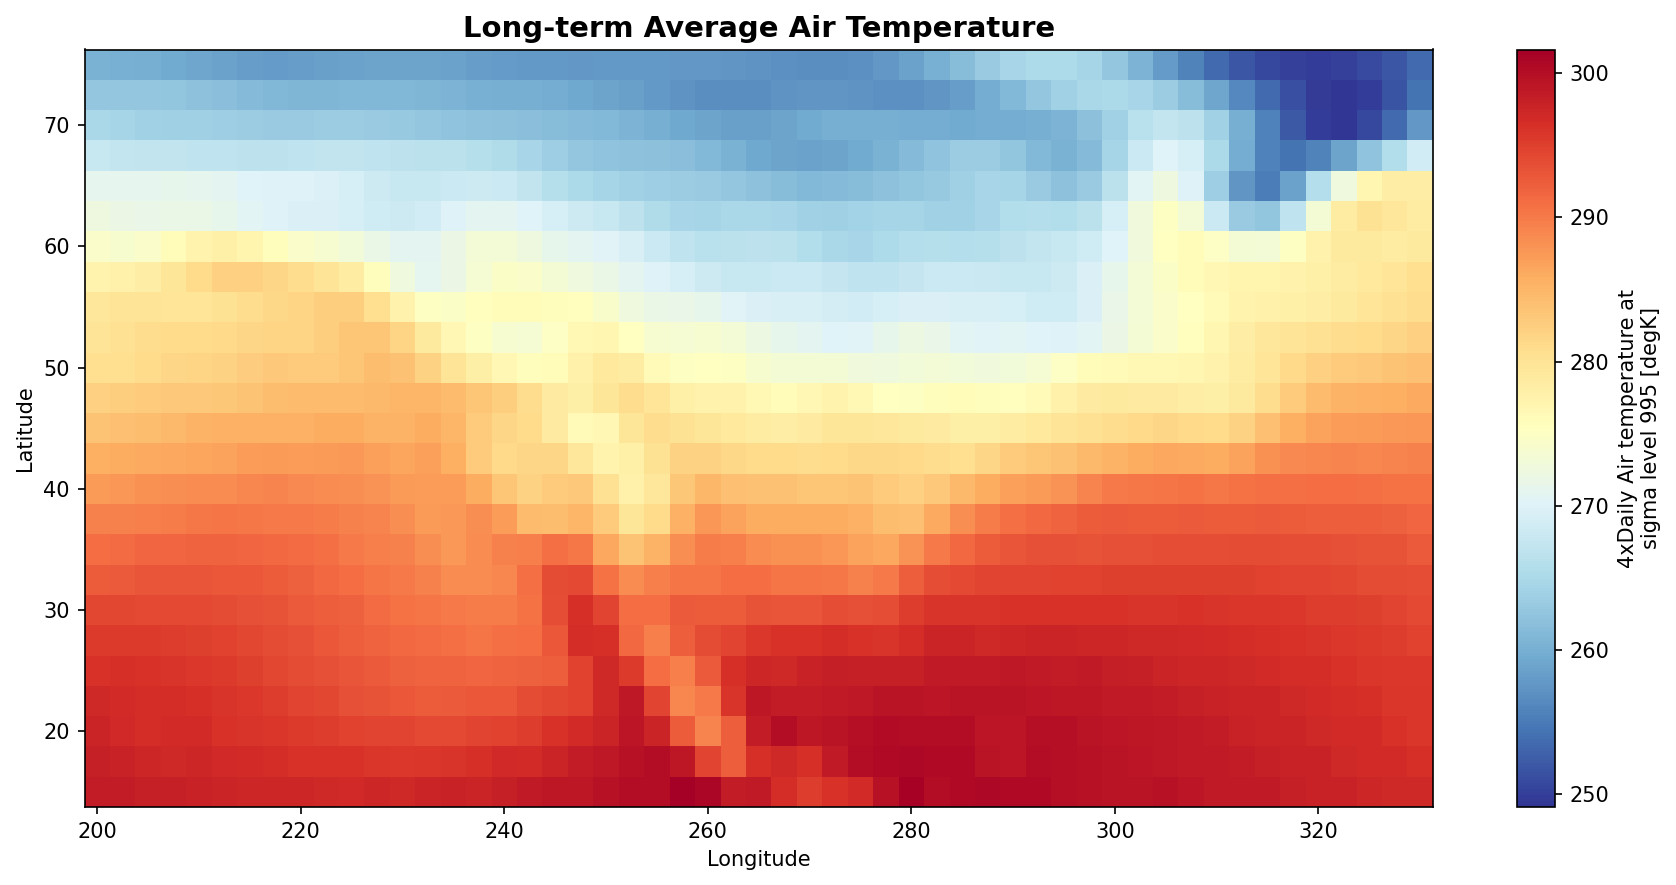

In [21]:
# Create a plot and assign the result to fig, ax
fig, ax = plt.subplots(figsize=(12,6))
# Call the plot function
mean_temperature.plot(ax=ax, cmap="RdYlBu_r", add_colorbar=True)
# Call the title function
plt.title("Long-term Average Air Temperature", fontsize=14, fontweight="bold")
# Call the xlabel function
plt.xlabel("Longitude")
# Call the ylabel function
plt.ylabel("Latitude")
# Call the tight_layout function
plt.tight_layout()
# Call the show function
plt.show()

### Customizing Spatial Plots

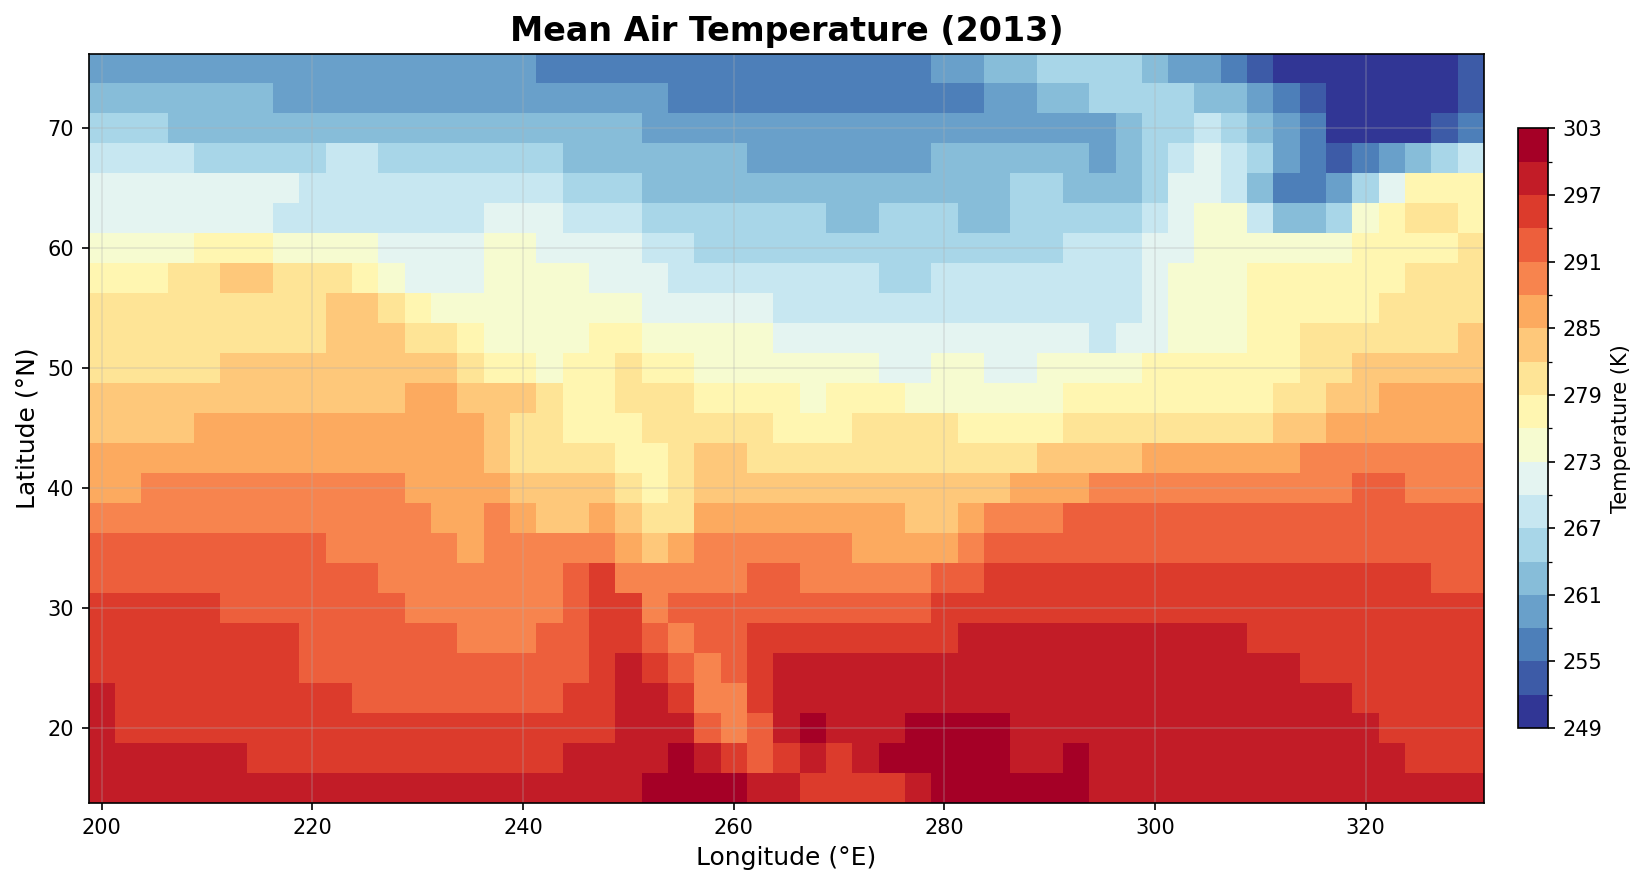

In [22]:
# Create a plot and assign the result to fig, ax
fig, ax = plt.subplots(figsize=(12,6))
# Create a plot and assign the result to plot
plot = mean_temperature.plot(
 # Assign a value to ax
 ax=ax,
 # Assign a value to cmap
 cmap= "RdYlBu_r",
 # Assign a value to levels
 levels= 20, # Number of contour levels
 # Assign a value to add_colorbar
 add_colorbar= True,
 # Define the dictionary for cbar_kwargs
 cbar_kwargs= {"label": "Temperature (K)", "shrink": 0.8, "pad": 0.02},
# Execute the following operation
)
# Call the title function
plt.title("Mean Air Temperature (2013)", fontsize=16, fontweight="bold")
# Call the xlabel function
plt.xlabel("Longitude (°E)", fontsize=12)
# Call the ylabel function
plt.ylabel("Latitude (°N)", fontsize=12)
# Call the grid function
plt.grid(True, alpha=0.3)
# Call the tight_layout function
plt.tight_layout()
# Call the show function
plt.show()

### Time Series Visualization

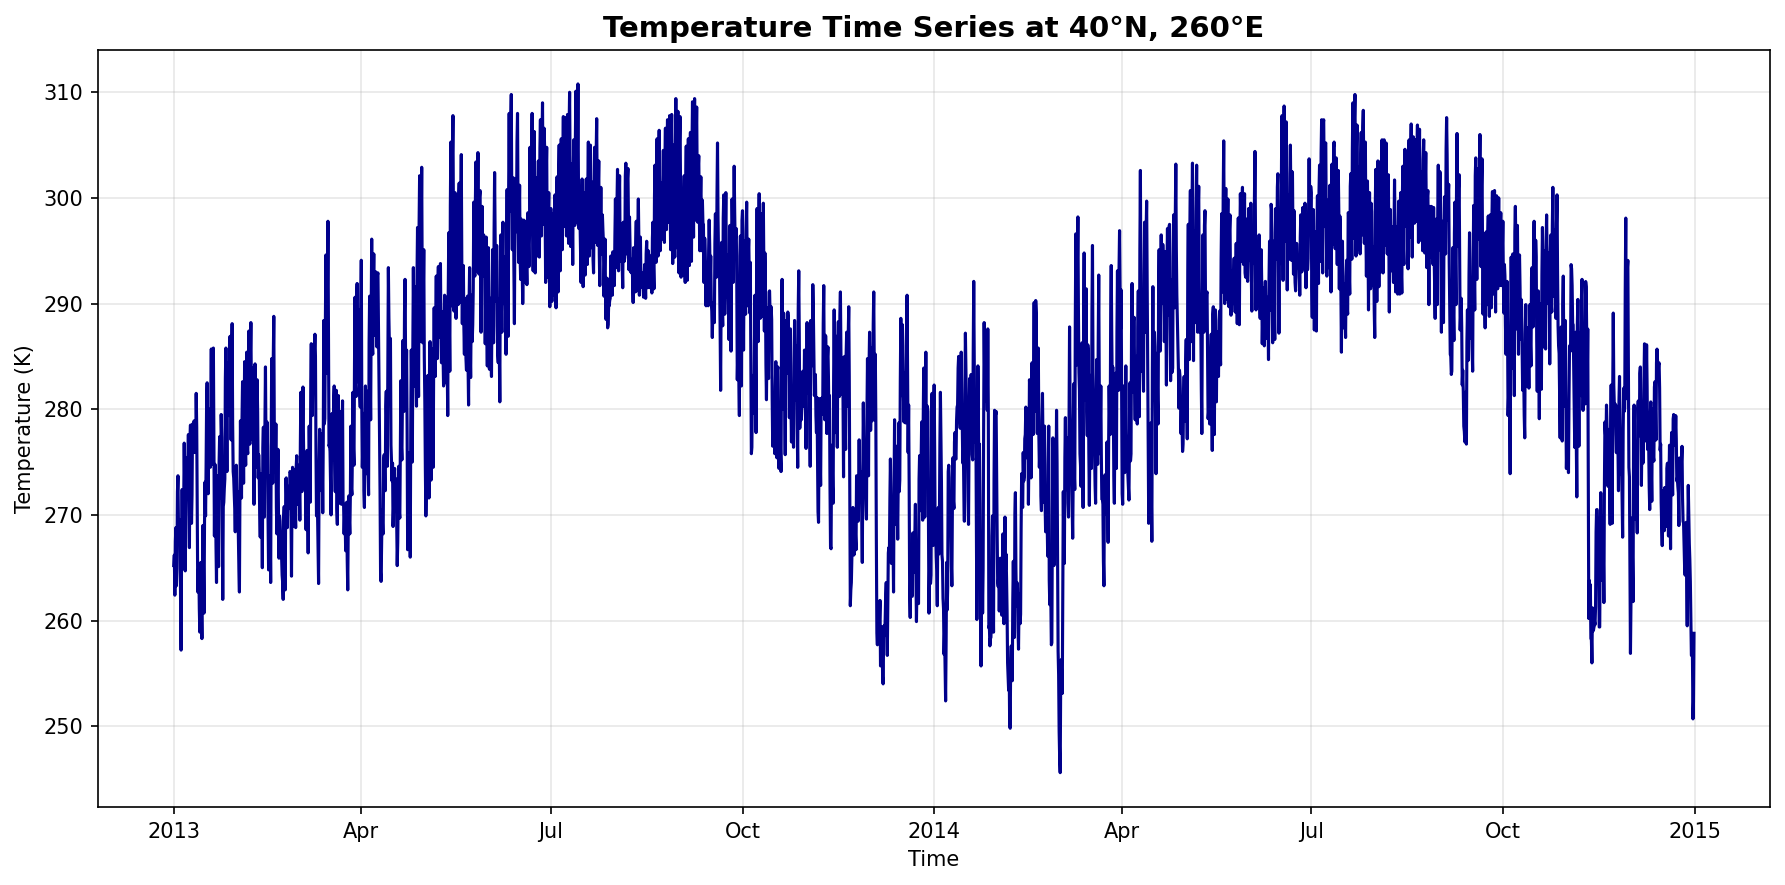

In [23]:
# Assign the result of the sel function to location_ts
location_ts = temperature.sel(lat=40.0, lon=260.0)
# Create a plot and assign the result to fig, ax
fig, ax = plt.subplots(figsize=(12,6))
# Call the plot function
location_ts.plot(ax=ax, linewidth=1.5, color="darkblue")
# Execute the following operation
plt.title("Temperature Time Series at 40°N, 260°E", fontsize=14,
# Assign a value to fontweight
fontweight="bold")
# Call the xlabel function
plt.xlabel("Time")
# Call the ylabel function
plt.ylabel("Temperature (K)")
# Call the grid function
plt.grid(True, alpha=0.3)
# Call the tight_layout function
plt.tight_layout()
# Call the show function
plt.show()

In [24]:
# Execute the following operation
ds.data_vars

Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7

### Multiple Variables

In [26]:
# Print information or results
print('Data variables in the dataset:')
# Loop over items
for var_name, var_info in ds.data_vars.items():
 # Print information or results
 print(f' {var_name}: {var_info}, shape {var_info.shape}')
# Print information or results
print(f'\nShared coordinates: {list(ds.coords.keys())}')
# Print information or results
print(f'Global attributes: {len(ds.attrs)} metadata items')

Data variables in the dataset:
 air: <xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ], shape (2920, 25, 53)

Shared coordinates: ['lat', 'lon', 'time']
Global attributes: 5 metadata items


In [27]:
# Assign the result of the mean function to dataset_means
dataset_means = ds.mean(dim='time')
# Execute the following operation
dataset_means

<xarray.Dataset> Size: 11kB
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Data variables:
    air      (lat, lon) float64 11kB 260.4 260.2 259.9 ... 297.3 297.3 297.3
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### Boolean Indexing and Conditional Selection

In [28]:
# Assign the result of the where function to warm_locations
warm_locations = mean_temperature.where(mean_temperature > 280)
# Assign the result of the count function to warm_count
warm_count = warm_locations.count()
# Print information or results
print(f'Number of grid points with mean temperature > 280 K: {warm_count.values}')

Number of grid points with mean temperature > 280 K: 747


In [30]:
# Assign the result of the quantile function to temp_threshold
temp_threshold = spatial_mean.quantile(0.9) # 90th percentile
# Assign the result of the where function to warm_periods
warm_periods = spatial_mean.where(spatial_mean > temp_threshold, drop=True)
# Print information or results
print(f'Number of exceptionally warm time periods: {warm_periods.count().values}')

Number of exceptionally warm time periods: 292


### GroupBy Operations for Temporal Analysis

In [31]:
# Assign the result of the groupby function to seasonal_means
seasonal_means = ds.air.groupby("time.season").mean()
# Print information or results
print('Seasonal temperature patterns:')
# Execute the following operation
seasonal_means

Seasonal temperature patterns:


<xarray.DataArray 'air' (season: 4, lat: 25, lon: 53)> Size: 42kB
247.0 247.0 246.7 246.3 245.6 244.9 ... 299.6 299.6 299.7 299.4 299.4 299.5
Coordinates:
  * season   (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

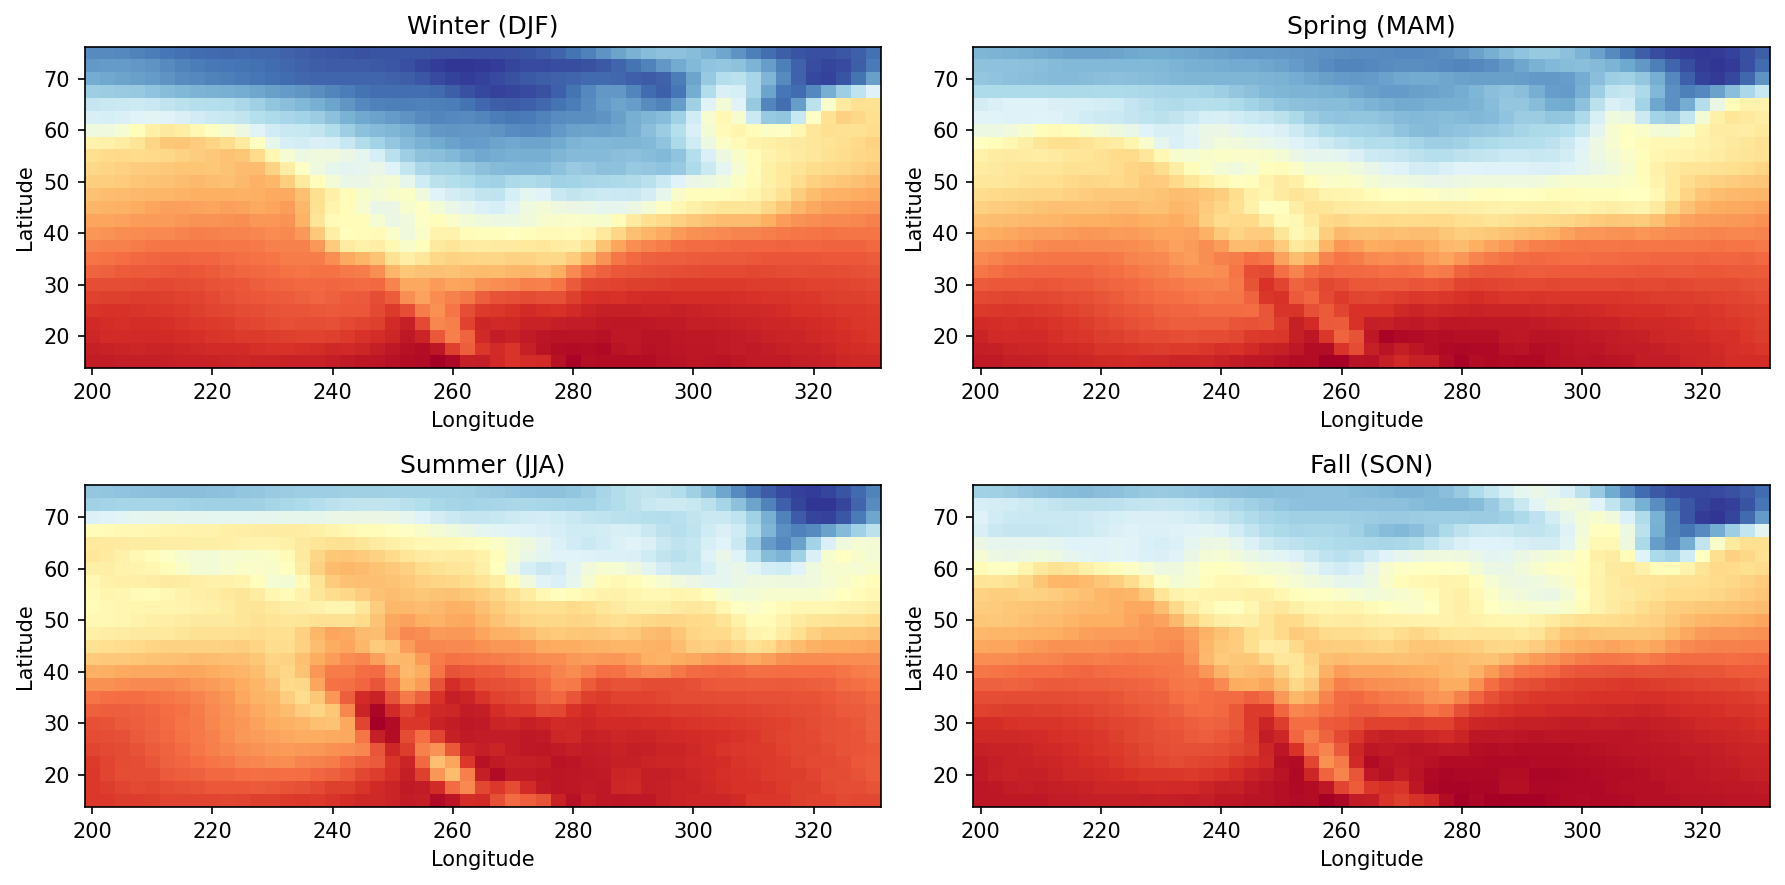

In [34]:
# Create a plot and assign the result to fig, axes
fig, axes = plt.subplots(2,2,figsize=(12,6))
# Assign a value to seasons
seasons = ["DJF", "MAM", "JJA", "SON"]
# Assign a value to season_names
season_names = ["Winter", "Spring", "Summer", "Fall"]
# Loop over items
for i, (season, name) in enumerate(zip(seasons, season_names)):
 # Assign a value to ax
 ax = axes[i // 2, i % 2]
 # Execute the following operation
 seasonal_means.sel(season=season).plot(ax=ax, cmap="RdYlBu_r",
# Assign a value to add_colorbar
add_colorbar=False) 
 # Call the set_title function
 ax.set_title(f"{name} ({season})")
 # Call the set_xlabel function
 ax.set_xlabel("Longitude")
 # Call the set_ylabel function
 ax.set_ylabel("Latitude")
# Call the tight_layout function
plt.tight_layout()
# Call the show function
plt.show()

### Rolling Window Operations

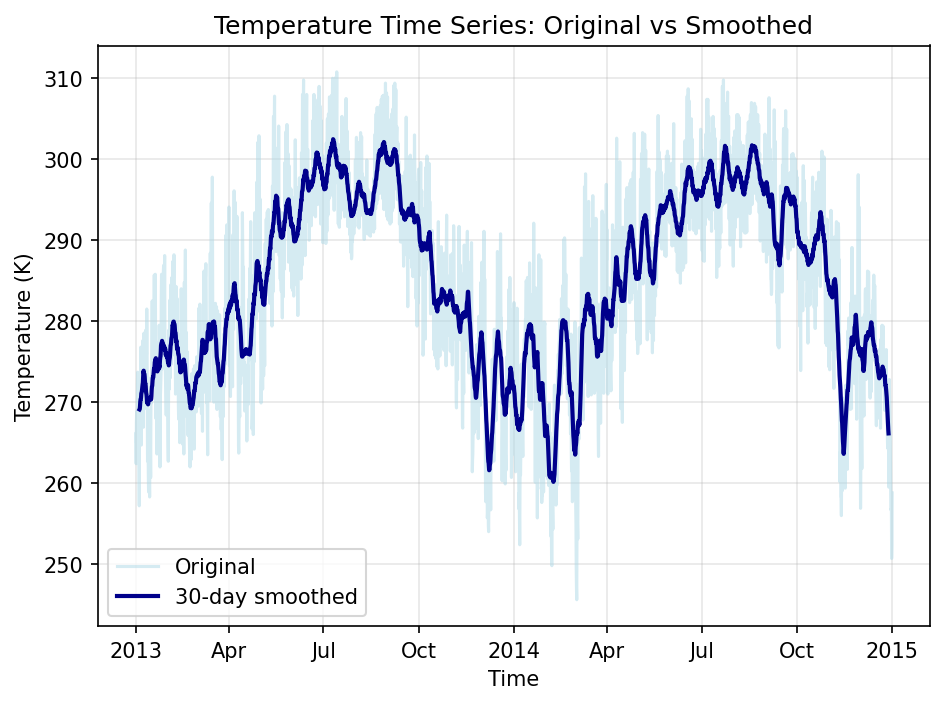

In [35]:
# Assign the result of the sel function to location_data
location_data = temperature.sel(lat=40.0, lon=260.0)
# Create a plot and assign the result to fig, ax
fig, ax = plt.subplots()
# Call the plot function
location_data.plot(ax=ax, alpha=0.5, label="Original", color="lightblue")
# Assign the result of the rolling function to smoothed_data
smoothed_data = location_data.rolling(time=30, center=True).mean()
# Call the plot function
smoothed_data.plot(ax=ax, label="30-day smoothed", color="darkblue", linewidth=2)
# Call the title function
plt.title("Temperature Time Series: Original vs Smoothed")
# Call the xlabel function
plt.xlabel("Time")
# Call the ylabel function
plt.ylabel("Temperature (K)")
# Call the legend function
plt.legend()
# Call the grid function
plt.grid(True, alpha=0.3)
# Call the tight_layout function
plt.tight_layout()
# Call the show function
plt.show()

### Weighted Operations

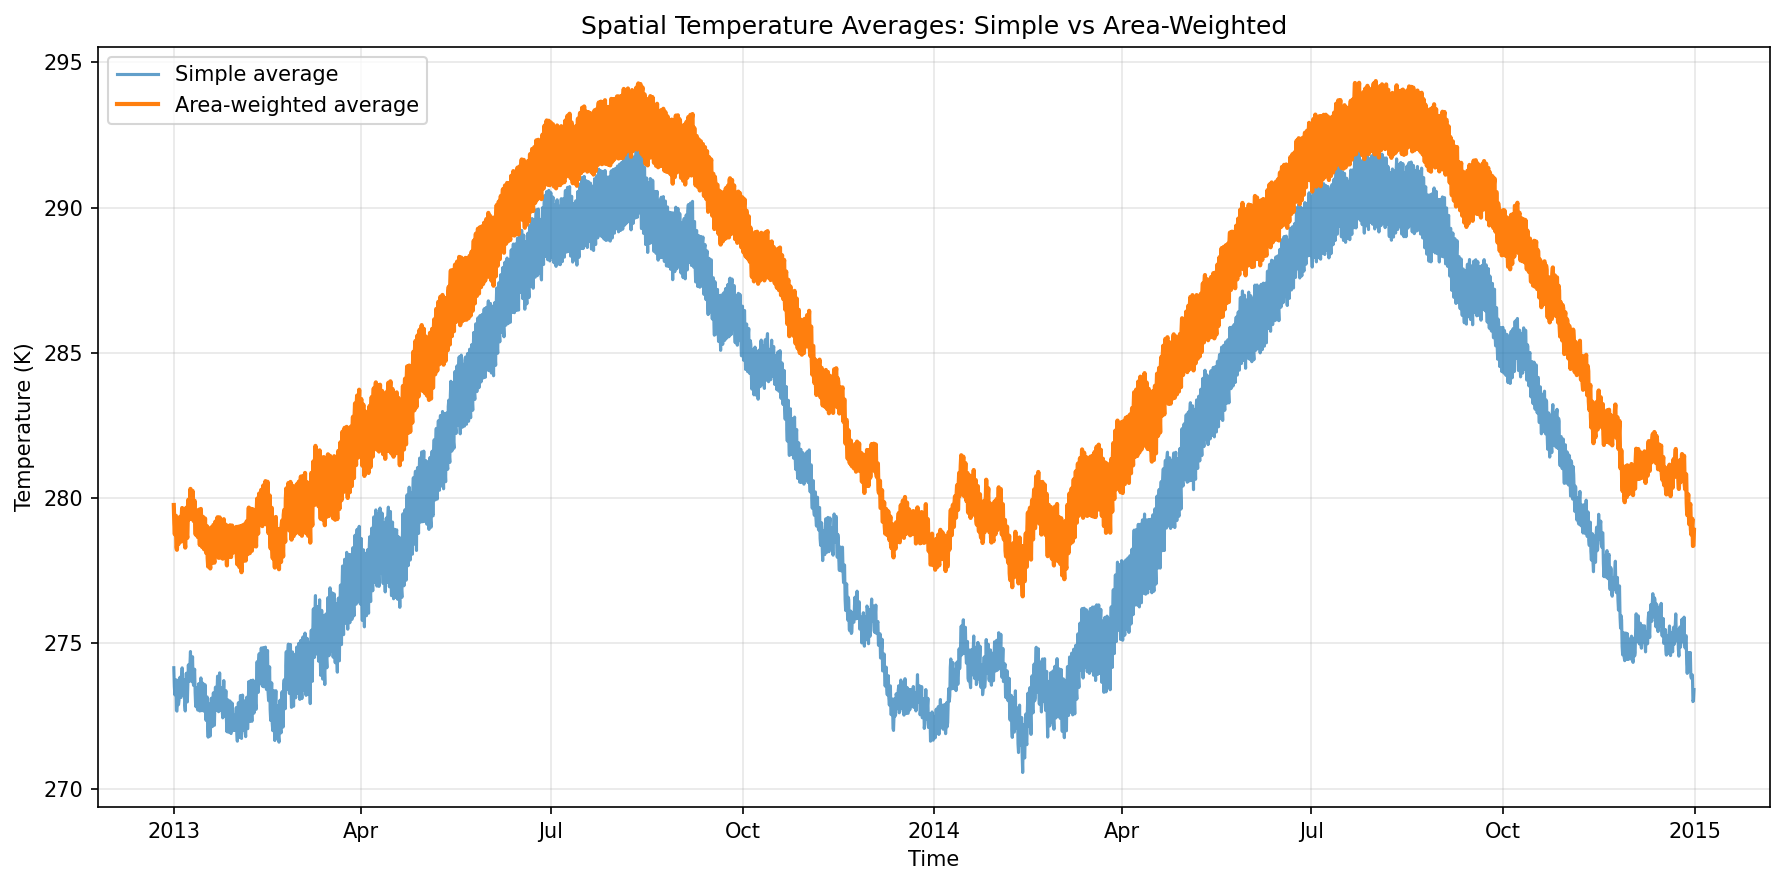

In [36]:
# Assign the result of the cos function to lat_weights
lat_weights = np.cos(np.radians(ds.air.lat))
# Assign the result of the weighted function to area_weighted_mean
area_weighted_mean = ds.air.weighted(lat_weights).mean(("lat", "lon"))
# Create a plot and assign the result to fig, ax
fig, ax = plt.subplots(figsize=(12,6))
# Call the plot function
spatial_mean.plot(ax=ax, label="Simple average", alpha=0.7)
# Call the plot function
area_weighted_mean.plot(ax=ax, label="Area-weighted average", linewidth=2)
# Call the title function
plt.title("Spatial Temperature Averages: Simple vs Area-Weighted")
# Call the xlabel function
plt.xlabel("Time")
# Call the ylabel function
plt.ylabel("Temperature (K)")
# Call the legend function
plt.legend()
# Call the grid function
plt.grid(True, alpha=0.3)
# Call the tight_layout function
plt.tight_layout()
# Call the show function
plt.show()

### Writing and Reading Data (NetCDF)

In [37]:
# Assign the result of the copy function to output_ds
output_ds = ds.copy()
# Extract the 'air' data array from the dataset
output_ds["air"] = ds.air
# Assign the result of the str function to output_ds.attrs["processing_date"]
output_ds.attrs["processing_date"] = str(np.datetime64('now'))
# Assign a value to output_ds.attrs["created_by"]
output_ds.attrs["created_by"] = "Debayan"
# Call the to_netcdf function
output_ds.to_netcdf("processed_air_temperature.nc")
# Print information or results
print('Dataset saved to processed_air_temperature.nc')

Dataset saved to processed_air_temperature.nc


c:\Users\arjav\AppData\Local\ESRI\conda\envs\gisprg\Lib\site-packages\IPython\core\interactiveshell.py:3579: SerializationWarning: saving variable air with floating point data as an integer dtype without any _FillValue to use for NaNs
  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:
# Load the dataset 'processed_air_temperature.nc'
reloaded_ds = dsr = xr.load_dataset("processed_air_temperature.nc")
# Print information or results
print('Successfully reloaded dataset:')
# Print information or results
print(f'Variables: {list(reloaded_ds.data_vars.keys())}')
# Print information or results
print(f"Processing date: {reloaded_ds.attrs.get('processing_date', 'Notspecified')}")
# Print information or results
print(f"Data matches original: {reloaded_ds.air.equals(ds.air.astype('float32'))}")

Successfully reloaded dataset:
Variables: ['air']
Processing date: 2026-02-04T18:42:24
Data matches original: False


## Introduction to Rioxarray
### Importing Libraries and Configuration

In [ ]:
# Import the required libraries: rioxarray

In [ ]:
# Call the set_options function
xr.set_options(keep_attrs=True, display_expand_data=False)
# Assign a value to plt.rcParams["figure.dpi"]
plt.rcParams["figure.dpi"] = 150

### Loading a Satellite Image

In [ ]:
# Assign a value to url
url = "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif" # Landsat satellite image covering Las Vegas area
# Open the raster file and assign it to data
data = 
# Print information or results
print(f'Successfully loaded raster with shape: {}')
# Execute the following operation
data

### Exploring the Dataset Structure

In [ ]:
# Print information or results
print('Dataset dimensions:')
# Print information or results
print('Dataset shape:')
# Print information or results
print('Data type:')

In [ ]:
# Print information or results
print('Coordinates:')
# Loop over items
for name, coord in :
 # Print information or results
 print(f' {}: {} to {}')

In [ ]:
# Print information or results
print('\nKey MetaData attributes:')
# Loop over items
for key, value in :
 # Conditional statement
 if key in ["long_name", "grid_mapping", "AREA_OR_POINT"]:
    # Print information or results
    print(f' {}: {}')

### Accessing Spatial Reference Information

In [ ]:
# Print information or results
print(f'Coordinate Reference System: {}')

In [ ]:
# Print information or results
print(f'Bounds: {}')

In [ ]:
# Print information or results
print('\nAffine transformation:')
# Print information or results
print(data.rio.transform())

In [ ]:
# Assign the result of the resolution function to res_x, res_y
res_x, res_y = 
# Print information or results
print(f'Pixel size: {} x {} meters')

### Understanding Spatial Extent

In [ ]:
# Print information or results
print(f'Current spatial resolution:')
# Print information or results
print(f' X (East-West): {} meters')
# Print information or results
print(f' Y (North-South): {} meters')

In [ ]:
# Assign the result of the bounds function to data_minx, data_miny, data_maxx, data_maxy
data_minx, data_miny, data_maxx, data_maxy = 
# Assign the result of the  function to width_km
width_km = 
# Assign the result of the  function to height_km
height_km = 
# Print information or results
print(f'\nSpatial extent:')
# Print information or results
print(f' Width: {} km')
# Print information or results
print(f' Height: {} km')

### Coordinate System Transformations

In [ ]:
# Print information or results
print(f'Original CRS: {}')
# Assign the result of the reproject function to data_geographic
data_geographic = 
# Print information or results
print(f'Reprojected CRS: {}')

In [ ]:
# Assign the result of the rename function to data_geographic
data_geographic = 
# Assign the result of the min function to minx
minx = 
# Assign the result of the max function to maxx
maxx = 
# Assign the result of the min function to miny
miny = 
# Assign the result of the max function to maxy
maxy = 
# minx, miny, maxx, maxy = data_geo.rio.bounds() [Note: Can use either method to get bounds]

In [ ]:
# Print information or results
print(f'New coordinate ranges:')
# Print information or results
print(f' Longitude: {} to {}')
# Print information or results
print(f' Latitude: {} to {}')

###  Spatial Subsetting with Bounding Boxes

In [ ]:
# Assign a value to vegas_bbox
vegas_bbox = [-115.391, 35.982, -114.988, 36.425]
# Print information or results
print('Clipping raster to Las Vegas area...')
# Assign the result of the clip_box function to clipped_data
clipped_data = 
# Print information or results
print(f'Original size: {}')
# Print information or results
print(f'Clipped size: {}')

In [ ]:
# Extract a subset using coordinate ranges (in geographic coordinates)
# Assign the result of the  function to lon_range
lon_range = (-115.391, -114.988)
# Assign the result of the  function to lat_range
lat_range = (35.982, 36.425)
# Print information or results
print('Selecting subset by coordinate ranges...')
# Assign the result of the sel function to subset
subset = 
 # Assign the result of the slice function to x
 x= ,
 # Assign the result of the slice function to y
 y= , # Note: y coordinates often decrease
# Execute the following operation
)
# Print information or results
print(f'Subset shape: {}')
# Print information or results
print(f'Longitude range: {} to {}')
# Print information or results
print(f'Latitude range: {} to {}')

### Overlaying Vector Data on Raster

In [ ]:
# Import the required libraries: geopandas
# Assign a value to boundary_url
boundary_url = "https://github.com/opengeos/datasets/releases/download/places/las_vegas_bounds_utm.geojson"
# Assign the result of the read_file function to boundary
boundary = 

In [ ]:
# Create a plot and assign the result to fig, ax
fig, ax = 
# Assign the result of the sel function to single_band
single_band =  # NIR band
# Assign a value to single_band.attrs["long_name"]
single_band.attrs["long_name"] = "Surface Reflectance" # Accessing metadata attribute
# Execute the following operation
single_band.plot.imshow(
 # Assign a value to ax
 ax= ,
 # Assign a value to vmin
 vmin= 0.1,
 # Assign a value to vmax
 vmax= 0.4, # Adjust based on data range
 # Assign a value to cmap
 cmap= "viridis",
 # Assign a value to add_colorbar
 add_colorbar= True,
# Execute the following operation
)
# Conditional statement
if "boundary" in locals():
 # Call the to_crs function
 boundary.to_crs(data.rio.crs).boundary.plot(ax=ax, color="red", linewidth=2)
# Execute the following operation
plt.title("Near-Infrared Band (Landsat 9) with Administrative Boundary", fontsize=14,
# Assign a value to fontweight
fontweight= 
# Call the xlabel function
plt.xlabel("Easting (m)", fontsize=12) # Optional
# Call the ylabel function
plt.ylabel("Northing (m)", fontsize=12) # Optional
# Call the tight_layout function
plt.tight_layout()

In [ ]:
# Checking data statistics for contrast stretching
# Assign the result of the isfinite function to valid
valid =  # Mask valid data, otherwise will report nan for the 2nd percentile
# Assign the result of the nanpercentile function to p2, p98
p2, p98 =  # Set vmin as 2nd percentile and vmax as 98th percentile (Include only the first decimal)
# Print information or results
print(f'2nd percentile: {}, 98th percentile: {}')

### Vector-Based Clipping

In [ ]:
# Print information or results
print(f'Boundary CRS: {}')
# Print information or results
print(f'Raster CRS: {}')

In [ ]:
# Assign the result of the clip function to clipped_by_vector
clipped_by_vector = 
# Print information or results
print(f'Vector-clipped size: {}')

### Resampling to Different Resolutions

In [ ]:
# Print information or results
print('Resampling to 1km resolution...')
# Assign the result of the reproject function to resampled_data
resampled_data = 
 # Assign the result of the  function to data.rio.crs, resolution
 data.rio.crs, resolution= (1000, 1000)
# Execute the following operation
)

In [ ]:
# Print information or results
print(f'Original shape: {}')
# Print information or results
print(f'Resampled shape: {}')

In [ ]:
# Assign the result of the prod function to original_pixels
original_pixels = 
# Assign the result of the prod function to resampled_pixels
resampled_pixels = 
# Assign a value to reduction_factor
reduction_factor = 
# Print information or results
print(f'Data reduction factor: {}x')

### Creating True-Color Composite Images

In [ ]:
# Create a plot and assign the result to fig, ax
fig, ax = 
# Assign the result of the sel function to rgb_bands
rgb_bands = 
# Execute the following operation
rgb_bands.plot.imshow(
 # Assign a value to ax
 ax= ,
 # Assign a value to vmin
 vmin= 0,
 # Assign a value to vmax
 vmax= 0.3, # maximum reflectance value
# Execute the following operation
)
# Execute the following operation
plt.title(
 # Assign a value to "Landsat True-Color Composite - Las Vegas Area", fontsize
 "Landsat True-Color Composite - Las Vegas Area", fontsize= 14,
  # Assign a value to fontweight
  fontweight= "bold"
# Execute the following operation
)
# Call the tight_layout function
plt.tight_layout()

### Saving Processed Raster Data

In [ ]:
# Assign a value to output_filename
output_filename = "las_vegas_landsat_clipped.tif"
# Assign the result of the str function to clipped_by_vector.attrs["processing_date"]
clipped_by_vector.attrs["processing_date"] = 
# Assign a value to clipped_by_vector.attrs["processed_by"]
clipped_by_vector.attrs["processed_by"] = "Debayan Mandal"
# Assign a value to clipped_by_vector.attrs["description"]
clipped_by_vector.attrs["description"] = "Landsat image clipped to Las Vegas area"
# Print information or results
print(f'Saving processed data to {}...')
# Conditional statement
if "saved_data" in locals():
    # Call the close function
    saved_data.close()
# Call the to_raster function
clipped_by_vector.rio.to_raster(output_filename, driver="COG", compress="DEFLATE", overwrite=True)
# Print information or results
print('File saved successfully!')
# Open the raster file and assign it to saved_data
saved_data = 
# Print information or results
print(f'Verified: Saved file has shape {} and CRS {}')

In [ ]:
# Create a plot and assign the result to fig, ax
fig, ax = 
# Call the sel function
data.sel(band=[4,3,2]).plot.imshow(ax=ax[0],vmax=0.4,vmin=0.05)
# Call the set_title function
ax[0].set_title("Source Landsat Image",fontweight="bold")
# Call the sel function
saved_data.sel(band=[4,3,2]).plot.imshow(ax=ax[1],vmax=0.4,vmin=0.1)
# Call the set_title function
ax[1].set_title("Saved Clipped File",fontweight="bold")
# Loop over items
for a in :
    # Call the set_ylabel function
    a.set_ylabel("Northing (m)")
    # Call the set_xlabel function
    a.set_xlabel("Easting (m)")
# Call the tight_layout function
plt.tight_layout()

### Managing no data values

In [ ]:
# Print information or results
print('Current NoData value:')

In [ ]:
# Assign the result of the where function to masked_data
masked_data = 

In [ ]:
# Assign the result of the set_nodata function to masked_data
masked_data = 
# Print information or results
print('Updated NoData value:')
# Print information or results
print(f'Total pixels in the original data: {}')
# Print information or results
print(f'Applied masking: {} pixels set to NoData')
# Assign the result of the sum function to prcnt_repl
prcnt_repl = 
# Print information or results
print(f'Percentage of pixels replaced: {}%')

### Normalized Difference Vegetation Index (NDVI)

In [ ]:
# Print information or results
print('Calculating NDVI...')
# Assign the result of the sel function to red_band
red_band =  # Red band
# Assign the result of the sel function to nir_band
nir_band =  # Near-infrared band
# Assign the result of the  function to ndvi
ndvi =  # Avoid division by zero
# Assign the result of the clip function to ndvi
ndvi = 
# Assign the result of the where function to ndvi
ndvi = 
# Assign a value to ndvi.attrs["long_name"]
ndvi.attrs["long_name"] = "Normalized Difference Vegetation Index"
# Assign a value to ndvi.attrs["valid_range"]
ndvi.attrs["valid_range"] = [-1, 1]
# Assign the result of the "NDVI = function to ndvi.attrs["description"]
ndvi.attrs["description"] = "NDVI = (NIR - Red) / (NIR + Red)"
# Print information or results
print(f'NDVI statistics:')
# Print information or results
print(f' Range: {} to {}')
# Print information or results
print(f' Mean: {}')

In [ ]:
# Create a plot and assign the result to fig, (ax1, ax2)
fig, (ax1, ax2) = 
# Execute the following operation
ndvi.plot.imshow(
 # Assign a value to ax
 ax= ,
 # Assign a value to cmap
 cmap= "RdYlGn",
 # Assign a value to vmin
 vmin= -0.2, # 1st percentile
 # Assign a value to vmax
 vmax= 0.4, # 99th percentile
 # Assign a value to add_colorbar
 add_colorbar= True,
# Execute the following operation
)
# Call the set_title function
ax1.set_title("NDVI Values", fontsize=14, fontweight="bold")
# Assign the result of the where function to vegetation_mask
vegetation_mask = 
# Execute the following operation
vegetation_mask.plot.imshow(
 # Assign a value to ax
 ax= ,
 # Assign a value to cmap
 cmap= "Greens",
 # Assign a value to vmin
 vmin= 0.3, # 2nd percentile
 # Assign a value to vmax
 vmax= 0.5, # 96th percentile
 # Assign a value to add_colorbar
 add_colorbar= True,
 # Define the dictionary for cbar_kwargs
 cbar_kwargs= {"label": "NDVI Value (Vegetation Only)"},
# Execute the following operation
)
# Call the set_title function
ax2.set_title("Vegetation Areas (NDVI > 0.3)", fontsize=14, fontweight="bold")
# Call the tight_layout function
plt.tight_layout()

In [ ]:
# Assign the result of the isfinite function to valid
valid = 
# Assign the result of the int function to total_pixels
total_pixels = 
# Assign the result of the sum function to vegetation_pixels
vegetation_pixels = 
# Assign the result of the sum function to water_pixels
water_pixels = 
# Assign the result of the sum function to urban_pixels
urban_pixels = 
# Print information or results
print('NDVI Analysis Results:')
# Print information or results
print(f' Total pixels analyzed: {}')
# Print information or results
print(f' Vegetation pixels (NDVI > 0.3): {} ({}%)')
# Print information or results
print(f' Water pixels (NDVI < 0): {} ({}%)')
# Print information or results
print(f' Urban/Bare soil (0 ≤ NDVI ≤ 0.3): {} ({}%)')